### Added Max Pooling and Relu activation functions
https://github.com/Theo-/sentiment-analysis-keras-conv/blob/master/train_keras.py


In [10]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout, MaxPooling1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

In [2]:
import tensorflow

In [7]:

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequence to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)





In [11]:
# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()

#maps vocab indices into embedding_dims dimensions
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Execute model, save logs to tensorboard. batch size is critical to observe convergence
model.fit(X_train, y_train, epochs=5, callbacks=[tensorBoardCallback], batch_size=64)


Epoch 1/3
25000/25000 [==============================] - 462s 18ms/step - loss: 0.4006 - acc: 0.7875
Epoch 2/3
25000/25000 [==============================] - 455s 18ms/step - loss: 0.1778 - acc: 0.9333
Epoch 3/3
25000/25000 [==============================] - 452s 18ms/step - loss: 0.1020 - acc: 0.9642


In [13]:
# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.66%


In [14]:
model.history.history['acc']

[0.7875200000381469, 0.933320000038147, 0.9641600000190735]

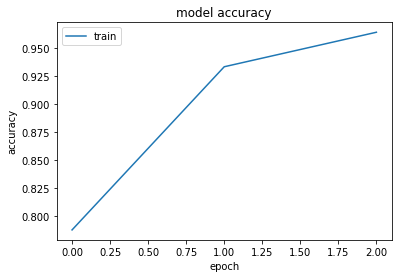

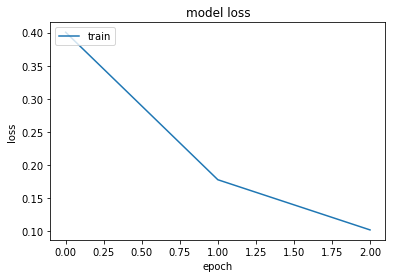

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history.history['acc'])
#plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Five epochs

In [17]:
# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()

#maps vocab indices into embedding_dims dimensions
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Execute model, save logs to tensorboard. batch size is critical to observe convergence
model.fit(X_train, y_train, epochs=5, callbacks=[tensorBoardCallback], batch_size=64)


Epoch 1/5
25000/25000 [==============================] - 467s 19ms/step - loss: 0.3731 - acc: 0.8092
Epoch 2/5
25000/25000 [==============================] - 476s 19ms/step - loss: 0.1697 - acc: 0.9371
Epoch 3/5
25000/25000 [==============================] - 469s 19ms/step - loss: 0.0946 - acc: 0.9666
Epoch 4/5
25000/25000 [==============================] - 464s 19ms/step - loss: 0.0577 - acc: 0.9812
Epoch 5/5
25000/25000 [==============================] - 467s 19ms/step - loss: 0.0347 - acc: 0.9892


In [19]:
# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.05%


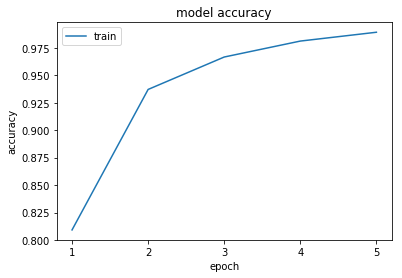

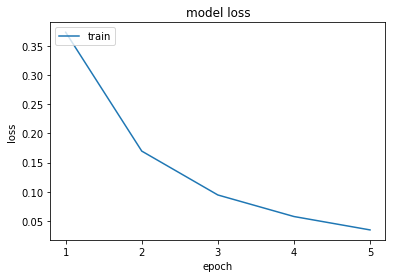

In [35]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(range(1,6), model.history.history['acc'])
#plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(1,6))
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(range(1,6), model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(1,6))
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### Save the weights

In [28]:
import h5py

In [36]:
model.save_weights('imdb_cnn_model_weights.h5')

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1600, 64)          57664     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 800, 64)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 800, 32)           6176      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 400, 32)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 400, 16)           1552      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 200, 16)           0         
__________

In [42]:
#names of the layers to use in Yelp CNN
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 embedding_6
1 conv1d_11
2 max_pooling1d_4
3 conv1d_12
4 max_pooling1d_5
5 conv1d_13
6 max_pooling1d_6
7 flatten_2
8 dropout_3
9 dense_3
10 dropout_4
11 dense_4
